In [7]:
# Import Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the Dataset

In [10]:
df = pd.read_csv("/content/rating_short.csv")

In [11]:
df

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200
...,...,...,...,...
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0,1347321600
78241,AMXTPQY23TN07,B004RB8CT4,4.0,1367539200
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0,1375315200
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0,1392768000


In [12]:
# Display first few rows

In [13]:
print(df.head())

           userid   productid  rating        date
0  A1Z3YJF1S8Z1M3  B000M9ISQ2     5.0  1199750400
1   ALDXDYEGKB27G  B002L6HE9G     4.0  1331337600
2  A15LOGO6NBSI6B  B007MXGG5Q     5.0  1358640000
3  A23LX12CA3G4FG  B008HOEDYU     1.0  1385337600
4  A3TV7QFYXAG130  B0069R7TAM     5.0  1402963200


In [14]:
# Display last few rows

In [15]:
print(df.tail())

               userid   productid  rating        date
78240  A1TWH3KD5YJQHM  B0035ERKYW     5.0  1347321600
78241   AMXTPQY23TN07  B004RB8CT4     4.0  1367539200
78242  A1FCG75OIMKQCT  B002LTWDSK     2.0  1375315200
78243  A2X2NI89D5BQ2E  B004P1V8TM     5.0  1392768000
78244  A2VAZBUX99XIWP  B0001FTVEK     5.0  1357344000


In [16]:
#  Basic Information

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB
None


In [18]:
print( df.shape)

(78245, 4)


In [19]:
# Checking for Missing Values

In [20]:
print(df.isnull().sum())

userid       0
productid    0
rating       0
date         0
dtype: int64


In [21]:
#  Basic Statistical Summary

In [22]:
print(df.describe())

             rating          date
count  78245.000000  7.824500e+04
mean       4.006454  1.338128e+09
std        1.385342  6.891994e+07
min        1.000000  9.320832e+08
25%        3.000000  1.315008e+09
50%        5.000000  1.360800e+09
75%        5.000000  1.386029e+09
max        5.000000  1.406074e+09


In [23]:
#  Unique Values Count

In [24]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


userid: 76430 unique values
productid: 40228 unique values
rating: 5 unique values
date: 4068 unique values


In [25]:
#  Distribution of Ratings

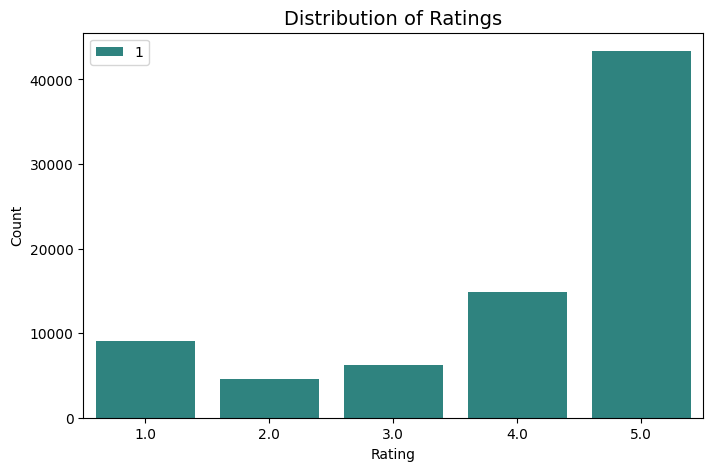

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, palette='viridis',hue=1)
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [27]:
# Ratings Percentage (Pie Chart)

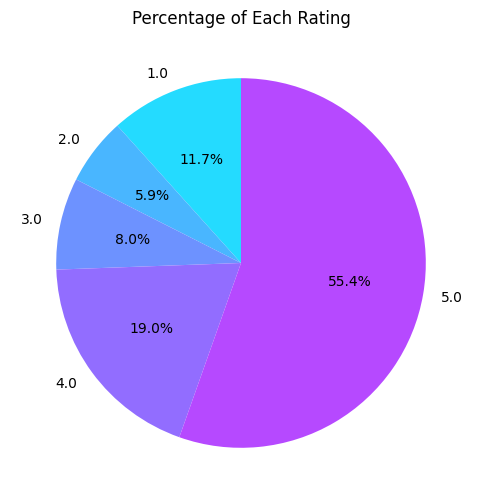

In [28]:
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('cool'))
plt.title("Percentage of Each Rating")
plt.show()

In [29]:
#  Number of Ratings per User

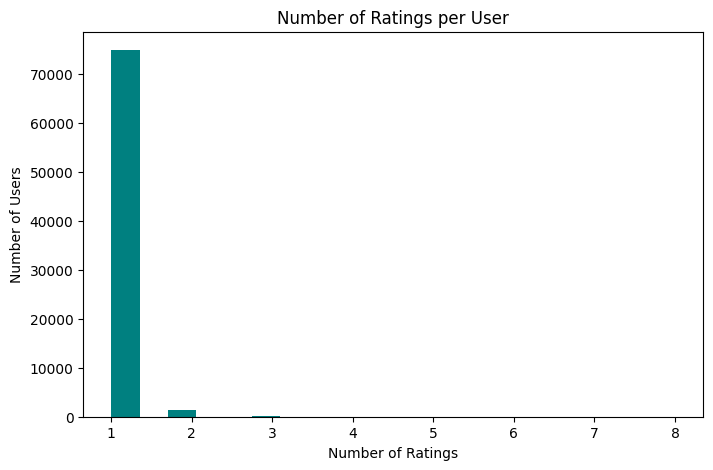

In [30]:
user_counts = df['userid'].value_counts()
plt.figure(figsize=(8,5))
plt.hist(user_counts, bins=20, color='teal')
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

In [31]:
#  Number of Ratings per Product

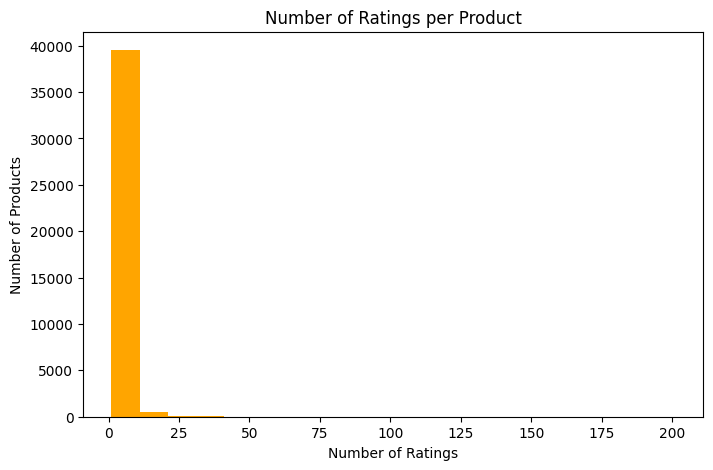

In [32]:
product_counts = df['productid'].value_counts()
plt.figure(figsize=(8,5))
plt.hist(product_counts, bins=20, color='orange')
plt.title("Number of Ratings per Product")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Products")
plt.show()

In [33]:
#  Top 10 Most Rated Products

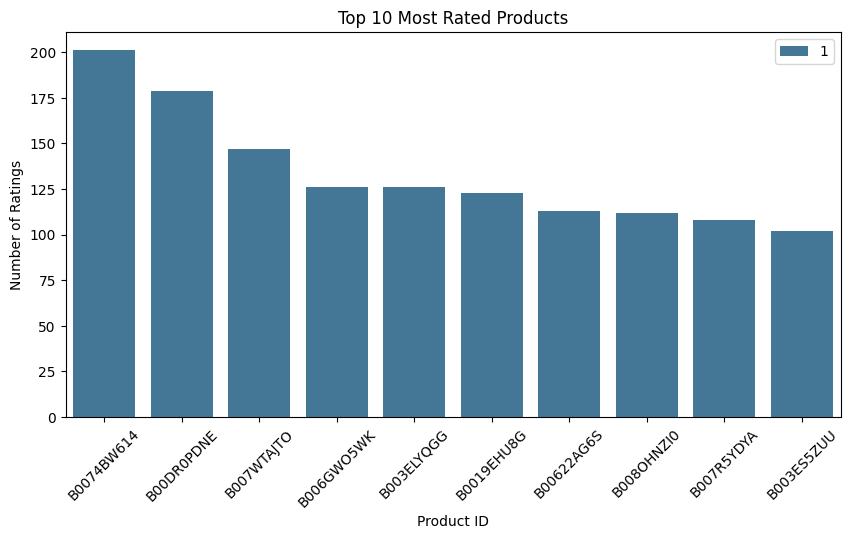

In [34]:
top_products = df['productid'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='mako',hue=1)
plt.title("Top 10 Most Rated Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Top 10 Most Active Users

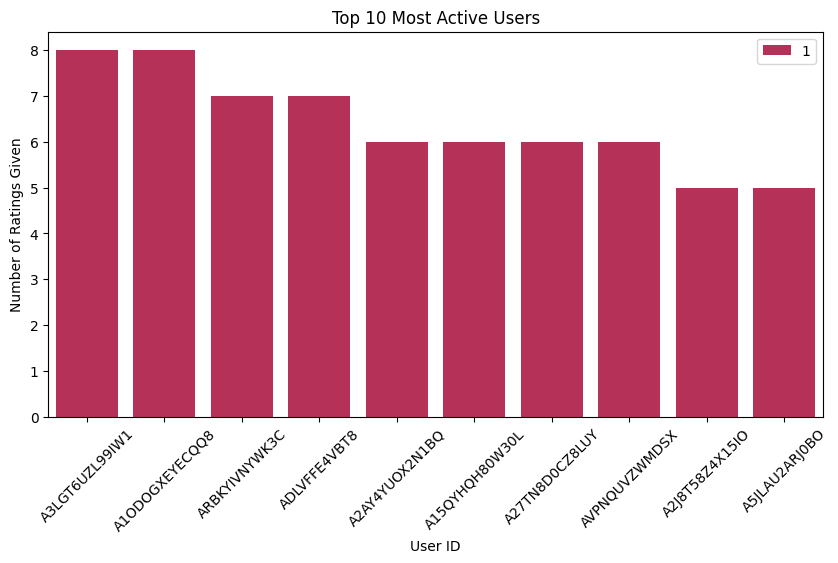

In [36]:
top_users = df['userid'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_users.index, y=top_users.values, palette='rocket',hue=1)
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings Given")
plt.xticks(rotation=45)
plt.show()

In [37]:
#  Average Rating per Product

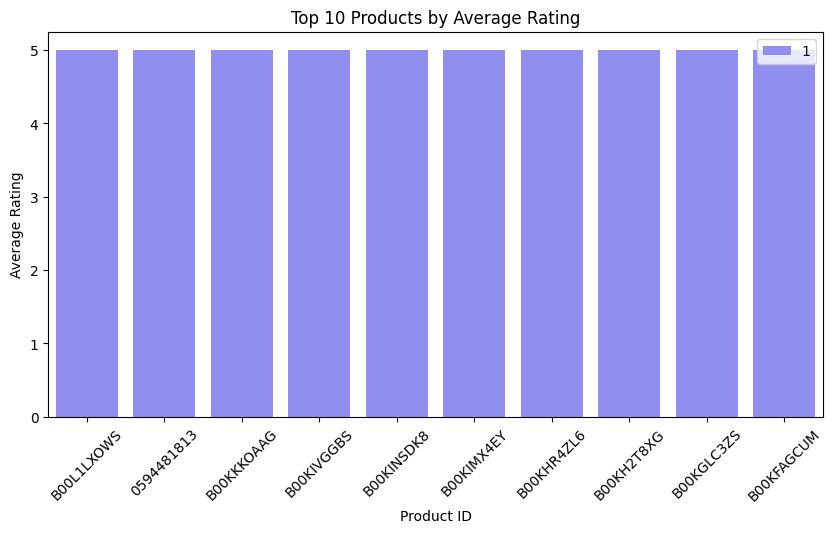

In [38]:
avg_rating = df.groupby('productid')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='cool',hue=1)
plt.title("Top 10 Products by Average Rating")
plt.xlabel("Product ID")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [39]:
#  Pair Plot (for Numeric Relationships)

In [40]:
df_numeric = df.copy()
df_numeric['userid'] = df_numeric['userid'].astype('category').cat.codes
df_numeric['productid'] = df_numeric['productid'].astype('category').cat.codes

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

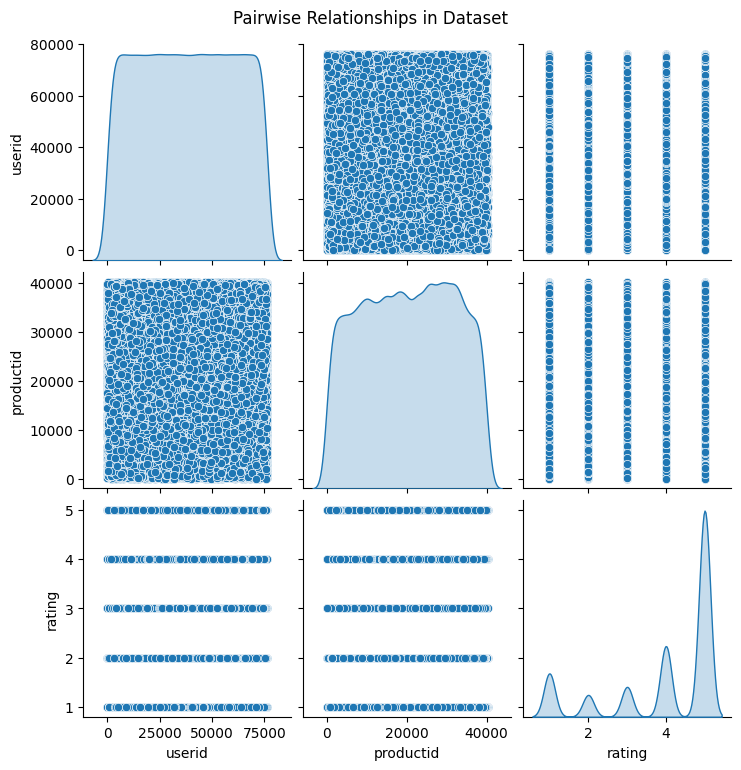

In [41]:
sns.pairplot(df_numeric[['userid', 'productid', 'rating']], diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships in Dataset", y=1.02)
plt.show()

In [42]:
# Average Rating per Product (Scatter Plot)

In [43]:
avg_rating_per_product = df.groupby('productid')['rating'].mean()
num_ratings_per_product = df.groupby('productid')['rating'].count()

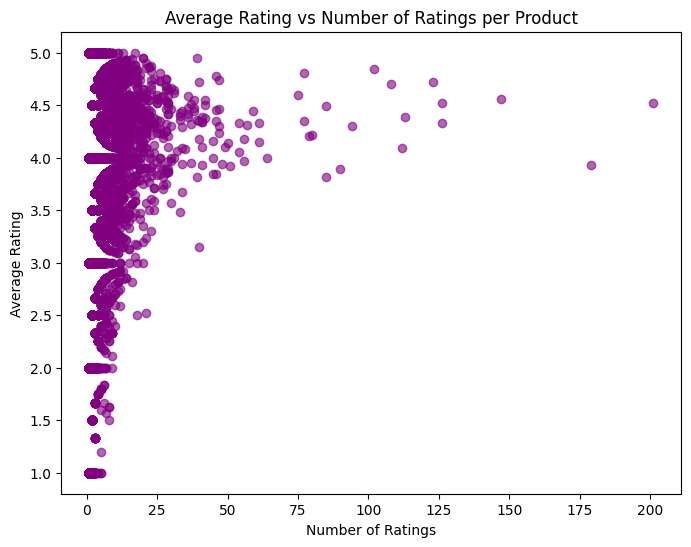

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(num_ratings_per_product, avg_rating_per_product, alpha=0.6, color='purple')
plt.title("Average Rating vs Number of Ratings per Product")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [45]:
# Check for Duplicates

In [46]:
duplicates = df.duplicated(subset=['userid', 'productid']).sum()

In [47]:
print(f"\n Number of duplicate user-product pairs: {duplicates}")


 Number of duplicate user-product pairs: 0


In [48]:
#  Key Insights

In [49]:
"\n EDA Insights Summary:"
"1️ Dataset is clean with no missing values."
"2️ Ratings distribution is skewed toward higher ratings (4 and 5)."
"3️ Some users and products dominate the dataset (long-tail effect)."
"4️ Data ready for collaborative filtering models."

'4️ Data ready for collaborative filtering models.'

In [50]:
df.columns

Index(['userid', 'productid', 'rating', 'date'], dtype='object')

In [51]:
import numpy as np
import pandas as pd

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score
)

In [55]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

In [56]:
RANDOM_STATE = 42

In [57]:
# 1️ Load dataset

In [58]:
df = pd.read_csv("/content/rating_short.csv")

In [59]:
df

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200
...,...,...,...,...
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0,1347321600
78241,AMXTPQY23TN07,B004RB8CT4,4.0,1367539200
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0,1375315200
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0,1392768000


In [60]:
df.columns = df.columns.str.strip()    # remove spaces

In [61]:
# Keep required columns
df = df[['userid', 'productid', 'rating', 'date']].copy()

In [62]:
# Convert datatypes
df['userid'] = df['userid'].astype(str)
df['productid'] = df['productid'].astype(str)
df['rating'] = df['rating'].astype(float)

In [63]:
print("✅ Data Loaded Successfully!")
print(df.head())

✅ Data Loaded Successfully!
           userid   productid  rating        date
0  A1Z3YJF1S8Z1M3  B000M9ISQ2     5.0  1199750400
1   ALDXDYEGKB27G  B002L6HE9G     4.0  1331337600
2  A15LOGO6NBSI6B  B007MXGG5Q     5.0  1358640000
3  A23LX12CA3G4FG  B008HOEDYU     1.0  1385337600
4  A3TV7QFYXAG130  B0069R7TAM     5.0  1402963200


In [64]:
# Count ratings by each user and each product
user_rating_count = df.groupby('userid')['rating'].count().rename('user_rating_count')
product_rating_count = df.groupby('productid')['rating'].count().rename('product_rating_count')

In [65]:
# Merge these into the dataset
df = df.merge(user_rating_count, on='userid', how='left')
df = df.merge(product_rating_count, on='productid', how='left')

In [116]:
df

,userid,productid,rating,date,user_rating_count,product_rating_count,like
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400,1,2,1
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600,1,7,1
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000,1,4,1
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600,1,2,0
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200,2,1,1
...,...,...,...,...,...,...,...
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0,1347321600,1,21,1
78241,AMXTPQY23TN07,B004RB8CT4,4.0,1367539200,1,1,1
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0,1375315200,1,3,0
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0,1392768000,1,3,1


In [66]:
# Fill missing values
df.fillna(0, inplace=True)

In [67]:
# Classification target: like (1) if rating >= 4 else 0
df['like'] = (df['rating'] >= 4.0).astype(int)

In [68]:
# Features we’ll use
X = df[['user_rating_count', 'product_rating_count', 'rating']]
y_class = df['like']
y_reg = df['rating']

In [69]:
# Split data for training/testing
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

In [70]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Helper function to print metrics
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{model_name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    return acc, prec, rec, f1

In [108]:
#  Classification Models

In [109]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_class)
y_pred_log = log_reg.predict(X_test_scaled)
evaluate_model(y_test_class, y_pred_log, "Logistic Regression")


Logistic Regression
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


(1.0, 1.0, 1.0, 1.0)

In [110]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_class)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test_class, y_pred_rf, "Random Forest")


Random Forest
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


(1.0, 1.0, 1.0, 1.0)

In [111]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_class)
y_pred_knn = knn.predict(X_test_scaled)
evaluate_model(y_test_class, y_pred_knn, "KNN Classifier")


KNN Classifier
Accuracy : 0.9998
Precision: 0.9997
Recall   : 1.0000
F1-Score : 0.9999


(0.9998082944597099, 0.9997428865272541, 1.0, 0.9998714267346677)

In [112]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_class)
y_pred_nb = nb.predict(X_test_scaled)
evaluate_model(y_test_class, y_pred_nb, "Naive Bayes")


Naive Bayes
Accuracy : 0.9977
Precision: 0.9969
Recall   : 1.0000
F1-Score : 0.9985


(0.9976995335165186, 0.9969233398854799, 1.0, 0.9984592998373706)

In [113]:
# SVC
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_scaled, y_train_class)
y_pred_svc = svc.predict(X_test_scaled)
evaluate_model(y_test_class, y_pred_svc, "Support Vector Classifier")


Support Vector Classifier
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


(1.0, 1.0, 1.0, 1.0)

In [114]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train_class)
y_pred_dt = dt.predict(X_test)
evaluate_model(y_test_class, y_pred_dt, "Decision Tree")


Decision Tree
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


(1.0, 1.0, 1.0, 1.0)